In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# 2. Define the model with L2 regularization
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layer 1 with L2 regularization
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001),
                            input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional layer 2 with L2 regularization
    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional layer 3 with L2 regularization
    model.add(layers.Conv2D(128, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output for the dense layers
    model.add(layers.Flatten())

    # Dense layer with L2 regularization
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))

    # Output layer for classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# 3. Create the model
input_shape = train_images.shape[1:]  # Shape is (32, 32, 3) for CIFAR-10 images
num_classes = 10  # CIFAR-10 has 10 different classes
model = create_cnn_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 5. Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,  # Number of times to iterate over the dataset
                    batch_size=64,  # Number of samples per gradient update
                    validation_data=(test_images, test_labels))  # Validation set

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.2997 - loss: 2.0186 - val_accuracy: 0.5004 - val_loss: 1.5000
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.5216 - loss: 1.4526 - val_accuracy: 0.5686 - val_loss: 1.3487
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.5815 - loss: 1.3147 - val_accuracy: 0.6043 - val_loss: 1.2587
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.6210 - loss: 1.2248 - val_accuracy: 0.6252 - val_loss: 1.2254
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.6468 - loss: 1.1619 - val_accuracy: 0.6464 - val_loss: 1.1787
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.6703 - loss: 1.1088 - val_accuracy: 0.6471 - val_loss: 1.1714
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.6870 - loss: 1.0689 - val_accuracy: 0.6410 - val_loss: 1.2104
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.6980 - loss: 1.0457 

In [ ]:
# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7008 - loss: 1.0481
Test accuracy: 69.87%


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

In [ ]:
import numpy as np

# Function to display images and their predictions
def display_images_predictions(images, labels, predictions, class_names, num_images=5):
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label = class_names[np.argmax(labels[i])]
        predicted_label = class_names[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')

    plt.show()

In [ ]:
# 7. Get predictions on the test set
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

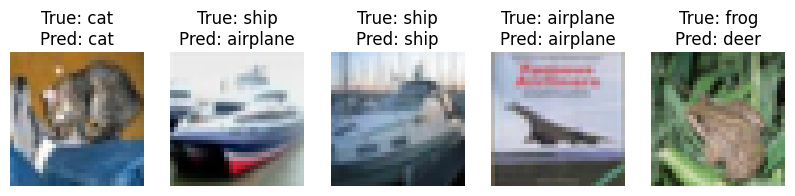

In [ ]:
# Display some test images along with their true labels and model's predictions
display_images_predictions(test_images[:5], test_labels[:5], predictions[:5], class_names)

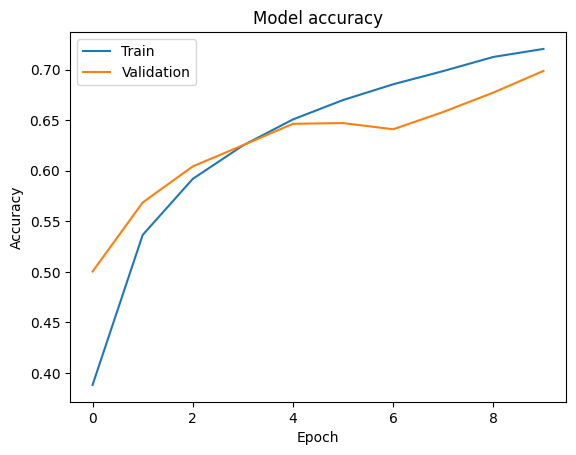

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

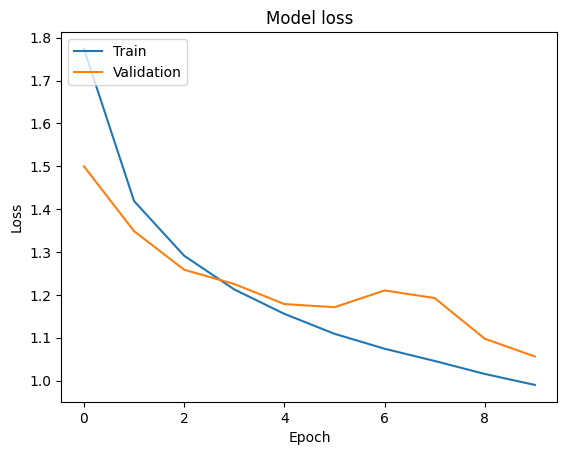

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()